In [1]:
import matplotlib.pyplot as pl
import numpy as np

In [2]:
result = np.loadtxt('./results/200_CN_ALL.dat')
SNRtot_MF = result.T[0]
sort_idx = np.argsort(SNRtot_MF)
[SNRtot_MF, SNRtot_opt, SNR220_MF, SNR220_opt, SNR200_MF,\
SNR200_opt, evidence220_200, evidence220, evidence200, nofilter] = result[sort_idx].T

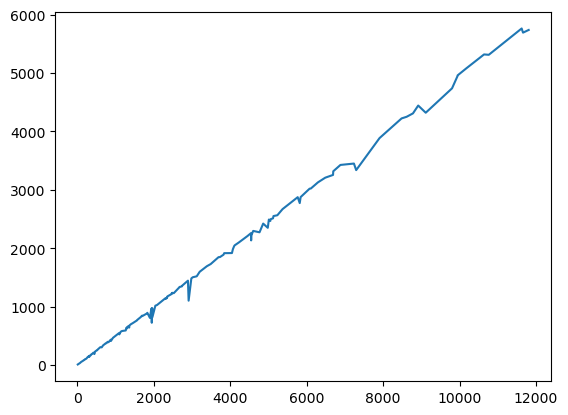

In [5]:
pl.plot(SNRtot_MF**2, evidence220_200 - nofilter)

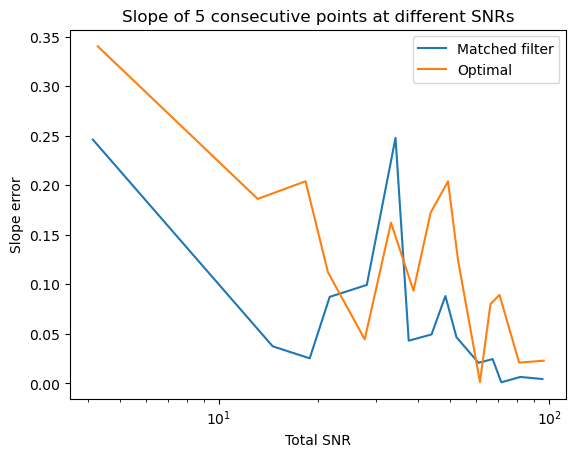

In [3]:
#Slope of nofilter
num_points = 10

MF_arr = []
opt_arr = []
for i,_ in enumerate(SNRtot_MF[::num_points]):
    slope_MF, _ = np.polyfit((SNRtot_MF**2)[num_points*i:num_points*i+num_points], 
                             nofilter[num_points*i:num_points*i+num_points], deg=1, cov=False)
    slope_opt, _ = np.polyfit((SNRtot_opt**2)[num_points*i:num_points*i+num_points], 
                              nofilter[num_points*i:num_points*i+num_points], deg=1, cov=False)
    MF_arr.append(slope_MF)
    opt_arr.append(slope_opt)
MF_arr = np.asarray(MF_arr)
opt_arr = np.asarray(opt_arr)

pl.semilogx(SNRtot_MF[::num_points], abs(MF_arr+0.5), label='Matched filter')
pl.semilogx(SNRtot_opt[::num_points], abs(opt_arr+0.5), label='Optimal')
# pl.xlim(13, 200)
pl.title("Slope of 5 consecutive points at different SNRs")
pl.xlabel("Total SNR")
pl.ylabel("Slope error")
pl.legend()

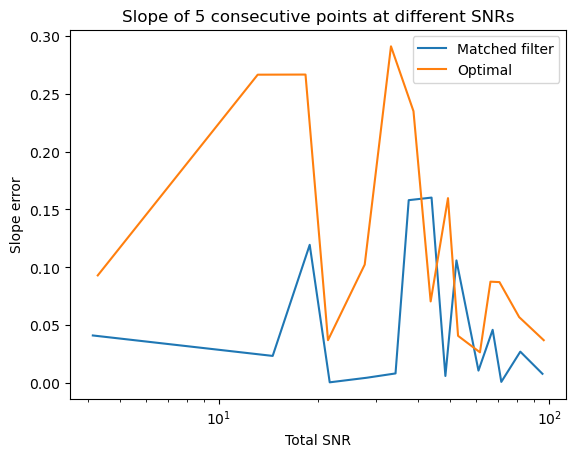

In [6]:
#Slope of 2:0
num_points = 10

MF_arr = []
opt_arr = []
for i,_ in enumerate(SNRtot_MF[::num_points]):
    slope_MF, _ = np.polyfit((SNRtot_MF**2)[num_points*i:num_points*i+num_points], 
                             (evidence220_200-nofilter)[num_points*i:num_points*i+num_points], deg=1, cov=False)
    slope_opt, _ = np.polyfit((SNRtot_opt**2)[num_points*i:num_points*i+num_points], 
                              (evidence220_200-nofilter)[num_points*i:num_points*i+num_points], deg=1, cov=False)
    MF_arr.append(slope_MF)
    opt_arr.append(slope_opt)
MF_arr = np.asarray(MF_arr)
opt_arr = np.asarray(opt_arr)

pl.semilogx(SNRtot_MF[::num_points], abs(MF_arr-0.5), label='Matched filter')
pl.semilogx(SNRtot_opt[::num_points], abs(opt_arr-0.5), label='Optimal')
# pl.xlim(13, 200)
pl.title("Slope of 5 consecutive points at different SNRs")
pl.xlabel("Total SNR")
pl.ylabel("Slope error")
pl.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


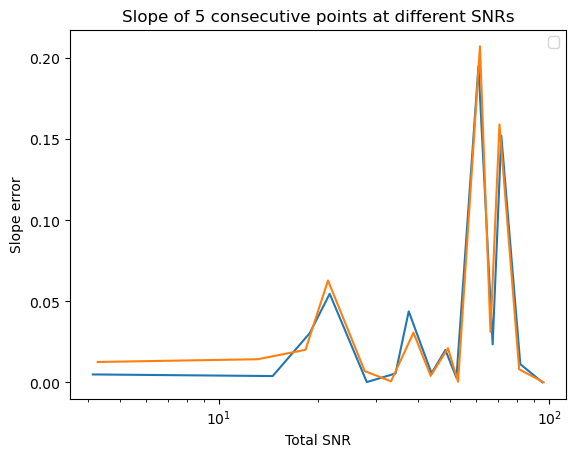

In [7]:
#Slope of 220+200:220
num_points = 10

MF_arr = []
opt_arr = []
for i,_ in enumerate(SNRtot_MF[::num_points]):
    slope_MF, _ = np.polyfit((SNR200_MF**2)[num_points*i:num_points*i+num_points], 
                             (evidence220_200-evidence220)[num_points*i:num_points*i+num_points], deg=1, cov=False)
    slope_opt, _ = np.polyfit((SNR200_opt**2)[num_points*i:num_points*i+num_points], 
                              (evidence220_200-evidence220)[num_points*i:num_points*i+num_points], deg=1, cov=False)
    MF_arr.append(slope_MF)
    opt_arr.append(slope_opt)
MF_arr = np.asarray(MF_arr)
opt_arr = np.asarray(opt_arr)

pl.semilogx(SNRtot_MF[::num_points], abs(MF_arr-MF_arr[-1]))
pl.semilogx(SNRtot_opt[::num_points], abs(opt_arr-opt_arr[-1]))
# pl.xlim(13, 200)
pl.title("Slope of 5 consecutive points at different SNRs")
pl.xlabel("Total SNR")
pl.ylabel("Slope error")
pl.legend()

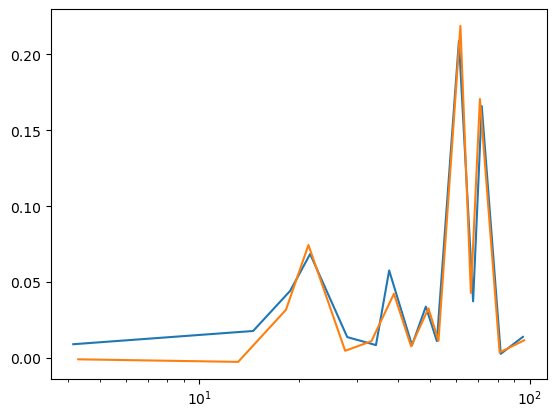

In [8]:
pl.semilogx(SNRtot_MF[::num_points], MF_arr)
pl.semilogx(SNRtot_opt[::num_points], opt_arr)

In [9]:
print(MF_arr[-1])
print(opt_arr[-1])

0.01380210122358684
0.011550054142300035


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


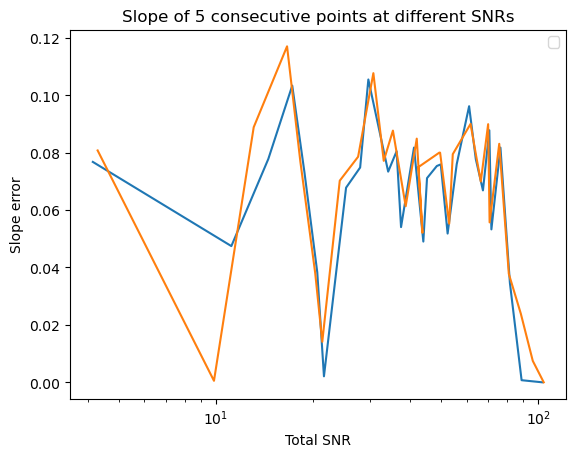

In [10]:
#Slope of 220+200:200
num_points = 5

MF_arr = []
opt_arr = []
for i,_ in enumerate(SNRtot_MF[::num_points]):
    slope_MF, _ = np.polyfit((SNR220_MF**2)[num_points*i:num_points*i+num_points], 
                             (evidence220_200-evidence200)[num_points*i:num_points*i+num_points], deg=1, cov=False)
    slope_opt, _ = np.polyfit((SNR220_opt**2)[num_points*i:num_points*i+num_points], 
                              (evidence220_200-evidence200)[num_points*i:num_points*i+num_points], deg=1, cov=False)
    MF_arr.append(slope_MF)
    opt_arr.append(slope_opt)
MF_arr = np.asarray(MF_arr)
opt_arr = np.asarray(opt_arr)

pl.semilogx(SNRtot_MF[::num_points], abs(MF_arr-MF_arr[-1]))
pl.semilogx(SNRtot_opt[::num_points], abs(opt_arr-opt_arr[-1]))
# pl.xlim(13, 200)
pl.title("Slope of 5 consecutive points at different SNRs")
pl.xlabel("Total SNR")
pl.ylabel("Slope error")
pl.legend()

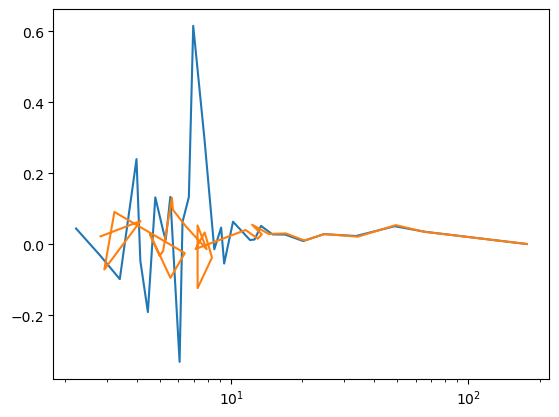

In [10]:
pl.semilogx(SNRtot_MF[::num_points], MF_arr)
pl.semilogx(SNRtot_opt[::num_points], opt_arr)

In [11]:
opt_arr[-1]

0.0009191987131649285

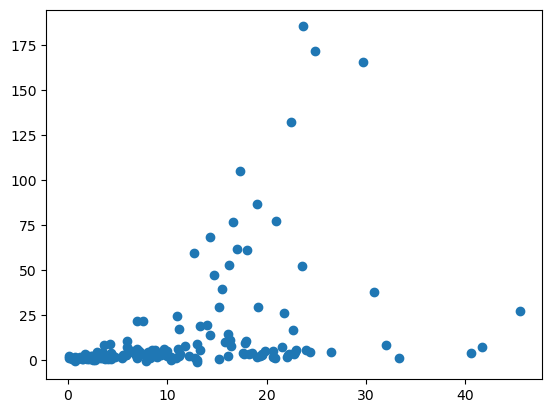

In [13]:
pl.plot(SNR200_opt, evidence220_200-evidence220, 'o')

(array([125.,   8.,   9.,   1.,   0.,   1.,   1.,   1.,   1.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   1.]),
 array([  2.21942435,  24.0791522 ,  45.93888005,  67.79860789,
         89.65833574, 111.51806359, 133.37779144, 155.23751928,
        177.09724713, 198.95697498, 220.81670283, 242.67643067,
        264.53615852, 286.39588637, 308.25561422, 330.11534206,
        351.97506991, 373.83479776, 395.69452561, 417.55425345,
        439.4139813 ]),
 <BarContainer object of 20 artists>)

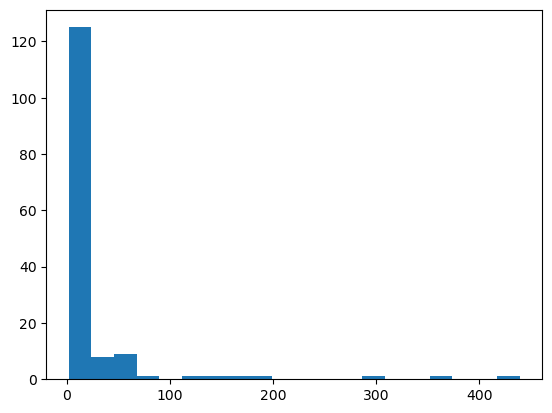

In [14]:
pl.hist(SNRtot_MF, bins=20)

In [16]:
G = 6.67e-11
c=3e8
pi = np.pi

def h0_calc(d, Mc, f):
    #d in units of pc. Mc in units of M_\odot
    temp0 = 4/(d*3.1e16)
    temp1 = (G*Mc*2e30/c**2)**(5/3)
    temp2 = (pi*f/c)**(2/3)
    return temp0*temp1*temp2

In [19]:
h0_calc(1e4, 1e-3, 50)

1.6151749828109815e-24